In [26]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [108]:
# loading train data 
df = pd.read_csv("train.csv",parse_dates=['pickup_datetime'],
                nrows=500000)

In [29]:
# loading test data
test_df = pd.read_csv("test.csv")

In [30]:
test_df.shape

(9914, 7)

In [31]:
df.shape 

(500000, 8)

In [32]:
df.head(5)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   key                500000 non-null  object             
 1   fare_amount        500000 non-null  float64            
 2   pickup_datetime    500000 non-null  datetime64[ns, UTC]
 3   pickup_longitude   500000 non-null  float64            
 4   pickup_latitude    500000 non-null  float64            
 5   dropoff_longitude  499995 non-null  float64            
 6   dropoff_latitude   499995 non-null  float64            
 7   passenger_count    500000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1), object(1)
memory usage: 30.5+ MB


# Exploratory data analysis

In [34]:
# range of longitude for NYC
nyc_min_longitude = -74.05
nyc_max_longitude = -73.75

# range of latitude for NYC
nyc_min_latitude = 40.63
nyc_max_latitude = 40.85

df2 = df.copy(deep=True)

for long in ['pickup_longitude', 'dropoff_longitude']:
    df2 = df2[(df2[long] > nyc_min_longitude) & (df2[long] <
                nyc_max_longitude)]
for lat in ['pickup_latitude', 'dropoff_latitude']:
    df2 = df2[(df2[lat] > nyc_min_latitude) & (df2[lat] <
                    nyc_max_latitude)]

In [35]:
landmarks = {'JFK Airport': (-73.78, 40.643),
             'Laguardia Airport': (-73.87, 40.77),
             'Midtown': (-73.98, 40.76),
             'Lower Manhattan': (-74.00, 40.72),
             'Upper Manhattan': (-73.94, 40.82),
             'Brooklyn': (-73.95, 40.66)}


In [48]:
def plot_lat_long(df, landmarks, points='Pickup'):
    plt.figure(figsize = (12,12)) # set figure size
    if points == 'pickup':
        plt.plot(list(df.pickup_longitude), list(df.pickup_latitude),
            '.', markersize=1)
    else:
        plt.plot(list(df.dropoff_longitude), list(df.dropoff_latitude),
            '.', markersize=1)
    for landmark in landmarks:
        plt.plot(landmarks[landmark][0], landmarks[landmark][1],
            '*', markersize=15, alpha=1, color='r')
        plt.annotate(landmark, (landmarks[landmark][0]+0.005,
            landmarks[landmark][1]+0.005), color='r',
            backgroundcolor='w')
plt.title("{} Locations in NYC Illustrated".format(points))
plt.grid(None)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

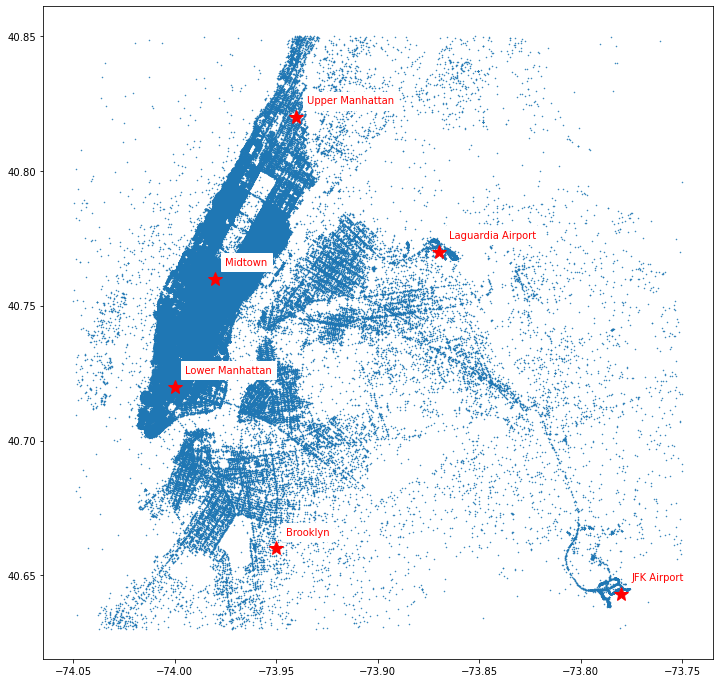

In [37]:
plot_lat_long(df2, landmarks, points='Pickup')

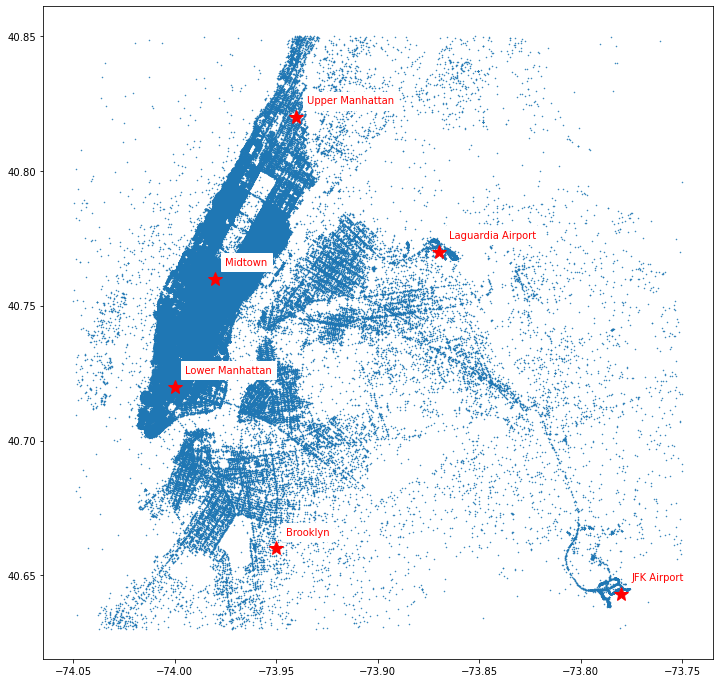

In [38]:
plot_lat_long(df2, landmarks, points='Drop Off')

In [39]:
df['year'] = df['pickup_datetime'].dt.year
df['month'] = df['pickup_datetime'].dt.month
df['day'] = df['pickup_datetime'].dt.day
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek
df['hour'] = df['pickup_datetime'].dt.hour

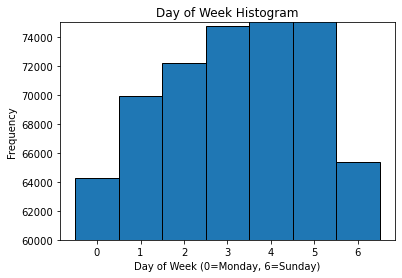

In [40]:
df['day_of_week'].plot.hist(bins=np.arange(8)-0.5, ec='black',
                            ylim=(60000,75000))
plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
plt.title('Day of Week Histogram')
plt.show()

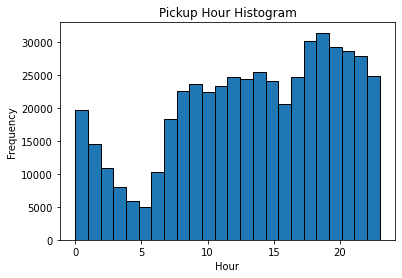

In [41]:
df['hour'].plot.hist(bins=24, ec='black')
plt.title('Pickup Hour Histogram')
plt.xlabel('Hour')
plt.show()

# Data precessing 

## handling missing values 

In [42]:
df.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    5
dropoff_latitude     5
passenger_count      0
year                 0
month                0
day                  0
day_of_week          0
hour                 0
dtype: int64

only 5 data are missing, they can be deleted without too much loss of information 

In [43]:
df = df.dropna()

## handling outiers 

In [44]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fare_amount,499995.0,11.358182,9.916069,-44.900000,6.000000,8.500000,12.500000,500.000000
pickup_longitude,499995.0,-72.520091,11.856446,-2986.242495,-73.992047,-73.981785,-73.967117,2140.601160
pickup_latitude,499995.0,39.920350,8.073318,-3116.285383,40.734916,40.752670,40.767076,1703.092772
dropoff_longitude,499995.0,-72.522435,11.797362,-3383.296608,-73.991382,-73.980126,-73.963572,40.851027
dropoff_latitude,499995.0,39.916526,7.391002,-2559.748913,40.734057,40.753152,40.768135,404.616667
passenger_count,499995.0,1.683445,1.307391,0.000000,1.000000,1.000000,2.000000,6.000000
year,499995.0,2011.739129,1.860897,2009.000000,2010.000000,2012.000000,2013.000000,2015.000000
month,499995.0,6.268617,3.437798,1.000000,3.000000,6.000000,9.000000,12.000000
day,499995.0,15.684239,8.681092,1.000000,8.000000,16.000000,23.000000,31.000000
day_of_week,499995.0,3.042020,1.949243,0.000000,1.000000,3.000000,5.000000,6.000000


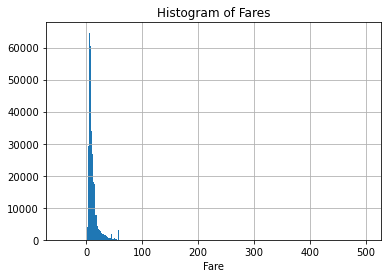

In [45]:
df['fare_amount'].hist(bins=500)
plt.xlabel("Fare")
plt.title("Histogram of Fares")
plt.show()

<AxesSubplot:xlabel='fare_amount'>

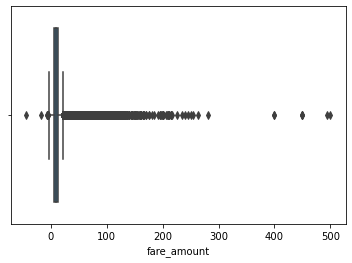

In [46]:
sns.boxplot(x=df["fare_amount"])

In [47]:
# remove outliers
df = df[(df['fare_amount'] >=0) & (df['fare_amount'] <= 100)]

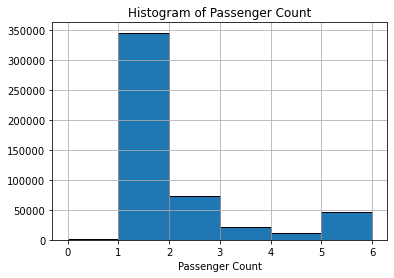

In [49]:
df['passenger_count'].hist(bins=6, ec='black')
plt.xlabel("Passenger Count")
plt.title("Histogram of Passenger Count")
plt.show()

In [50]:
df.loc[df['passenger_count']==0, 'passenger_count'] = 1

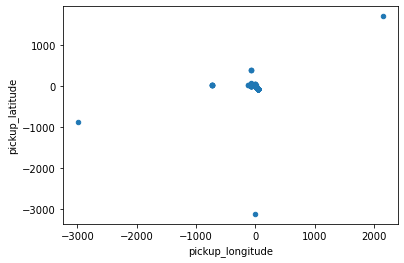

In [51]:
df.plot.scatter('pickup_longitude', 'pickup_latitude')
plt.show()

In [53]:
# range of longitude for NYC
nyc_min_longitude = -74.05
nyc_max_longitude = -73.75
# range of latitude for NYC
nyc_min_latitude = 40.63
nyc_max_latitude = 40.85
# only consider locations within NYC

for long in ['pickup_longitude', 'dropoff_longitude']:
    df = df[(df[long] > nyc_min_longitude) & (df[long] <
                nyc_max_longitude)]

for lat in ['pickup_latitude', 'dropoff_latitude']:
    df = df[(df[lat] > nyc_min_latitude) & (df[lat] <
                nyc_max_latitude)]

## encoding time data

In [110]:
df['year'] = df['pickup_datetime'].dt.year
df['month'] = df['pickup_datetime'].dt.month
df['day'] = df['pickup_datetime'].dt.day
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek
df['hour'] = df['pickup_datetime'].dt.hour

In [111]:
df.loc[:5,['pickup_datetime', 'year', 'month',
            'day', 'day_of_week', 'hour']]

,pickup_datetime,year,month,day,day_of_week,hour
0,2009-06-15 17:26:21+00:00,2009,6,15,0,17
1,2010-01-05 16:52:16+00:00,2010,1,5,1,16
2,2011-08-18 00:35:00+00:00,2011,8,18,3,0
3,2012-04-21 04:30:42+00:00,2012,4,21,5,4
4,2010-03-09 07:51:00+00:00,2010,3,9,1,7
5,2011-01-06 09:50:45+00:00,2011,1,6,3,9


In [112]:
df = df.drop("pickup_datetime", axis = 1)


In [113]:
df_temp = df.copy()
df_temp.head()

,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,day_of_week,hour
0,2009-06-15 17:26:21.0000001,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,0,17
1,2010-01-05 16:52:16.0000002,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,1,16
2,2011-08-18 00:35:00.00000049,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,3,0
3,2012-04-21 04:30:42.0000001,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,5,4
4,2010-03-09 07:51:00.000000135,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,1,7


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 483438 entries, 0 to 499999
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        483438 non-null  float64
 1   pickup_longitude   483438 non-null  float64
 2   pickup_latitude    483438 non-null  float64
 3   dropoff_longitude  483438 non-null  float64
 4   dropoff_latitude   483438 non-null  float64
 5   passenger_count    483438 non-null  int64  
 6   year               483438 non-null  int64  
 7   month              483438 non-null  int64  
 8   day                483438 non-null  int64  
 9   day_of_week        483438 non-null  int64  
 10  hour               483438 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 60.4 MB


In [59]:
df = df.drop('key', axis = 1)

## Adding new features :  the distance travelled in cabs 

If  $A(x_A,y_A)$ and $B(x_b,y_B)$ the distance $AB$ is 

$$ AB = \sqrt{(x_B-x_A)^2+(y_B-y_A)^2} $$


In [62]:
def euc_distance(lat1, long1, lat2, long2):
    ''' Compute the distance traveled '''
    return(((lat1-lat2)**2 + (long1-long2)**2)**0.5)

In [63]:
df['distance'] = euc_distance(df['pickup_latitude'],
                    df['pickup_longitude'],
                    df['dropoff_latitude'],
                    df['dropoff_longitude'])

In [64]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,day_of_week,hour,distance
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,0,17,0.009436
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,1,16,0.079696
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,3,0,0.013674
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,5,4,0.025340
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,1,7,0.019470


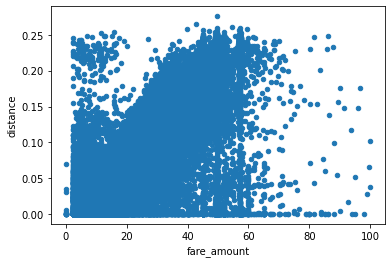

In [65]:
df.plot.scatter('fare_amount', 'distance')
plt.show()

In [66]:
airports = {'JFK_Airport': (-73.78,40.643),
            'Laguardia_Airport': (-73.87, 40.77),
            'Newark_Airport' : (-74.18, 40.69)}

for airport in airports:
    df['pickup_dist_' + airport] = euc_distance(df['pickup_latitude'],
                                df['pickup_longitude'],
                                airports[airport][1],
                                airports[airport][0])

    df['dropoff_dist_' + airport] = euc_distance(df['dropoff_latitude'],
                                df['dropoff_longitude'],
                                airports[airport][1],
                                airports[airport][0])

# Feature scaling

In [67]:
df_prescaled = df.copy()

In [69]:
df_prescaled = df.drop("fare_amount", axis = 1)

In [72]:
from sklearn.preprocessing import scale   

df_scaled = scale(df_prescaled)

In [74]:
cols = df.columns.tolist()
cols.remove('fare_amount')
df_scaled = pd.DataFrame(df_scaled, columns=cols, index=df.index)
df_scaled = pd.concat([df_scaled, df['fare_amount']], axis=1)
df = df_scaled.copy()

# Build the Deep feedforward networks model

In [75]:
X = df.loc[:, df.columns != 'fare_amount']
y = df.loc[:,'fare_amount']

## split the data into train and test 

In [76]:
from sklearn.model_selection import train_test_split

Xtrain,Xtest,ytrain,ytest = train_test_split(X,y, test_size= 0.2)

In [81]:
from keras.models import Sequential
from keras.layers import Dense 

features_nbr = Xtrain.shape[1]
model = Sequential()
model.add(Dense(128,activation= 'relu',input_dim = features_nbr))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1)) # output layers 

In [82]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 128)               2304      
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 8)                 264       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 12,913
Trainable params: 12,913
Non-trainable params: 0
_________________________________________________________________


In [83]:
model.compile(loss = 'mse',optimizer = 'adam', metrics= ['mse'])
model.fit(Xtrain, ytrain, epochs = 1)

2023-01-22 17:08:59.407527: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 52598000 exceeds 10% of free system memory.


12086/12086 [==============================] - 20s 2ms/step - loss: 13.9553 - mse: 13.9553


In [90]:
df_prescaled = df.copy()

In [103]:
df_prescaled['day_of_week'] = test_df['day_of_week']

In [105]:
test_df['day_of_week']

0        -1.560801
1        -1.047515
2        -0.020945
3         1.005625
4        -1.047515
            ...   
499995   -0.020945
499996   -1.560801
499997   -1.560801
499998   -1.560801
499999   -1.560801
Name: day_of_week, Length: 483438, dtype: float64

In [124]:
def predict_random(df_prescaled, X_test, model):
    sample = X_test.sample(n=1, random_state=np.random.randint(low=0,
                high=10000))
    idx = sample.index[0]
    actual_fare = df_prescaled.loc[idx,'fare_amount']
    day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
                'Saturday', 'Sunday']
    day_of_week = day_names[df_prescaled.loc[idx,'day_of_week']]
    hour = df_prescaled.loc[idx,'hour']
    predicted_fare = model.predict(sample)[0][0]
    rmse = np.sqrt(np.square(predicted_fare-actual_fare))
    print("Trip Details: {}, {}:00hrs".format(day_of_week, hour))
    print("Actual fare: ${:0.2f}".format(actual_fare))
    print("Predicted fare: ${:0.2f}".format(predicted_fare))
    print("RMSE: ${:0.2f}".format(rmse))

predict_random(df_temp, Xtest, model)

1/1 [==============================] - 0s 29ms/step
Trip Details: Friday, 14:00hrs
Actual fare: $5.00
Predicted fare: $7.41
RMSE: $2.41
